In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dt = pd.read_excel('/content/base_de_dados_estatica_final (2).xlsx', index_col=0) #para o nome do país ficar como índice

In [ ]:
dt.head()
dt.info()
dt.columns

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, Aruba to Zimbabwe
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   %_da_população_total_vivendo_em_cidades    168 non-null    float64
 1   qtd_cidades_pop_maior_17M                  168 non-null    int64  
 2   densidade_media_cidades_pop_maior_17M      168 non-null    float64
 3   qtd_cidades_pop_entre_17M_13M              168 non-null    int64  
 4   densidade_media_cidades_pop_entre_17M_13M  168 non-null    float64
 5   qtd_cidades_pop_entre_13M_9M_AT            168 non-null    int64  
 6   densidade_media_cidades_pop_entre_13M_9M   168 non-null    float64
 7   qtd_cidades_pop_entre_9M_1M                168 non-null    int64  
 8   densidade_media_cidades_pop_entre_9M_1M    168 non-null    float64
 9   qtd_cidades_pop_entre_1M_500k              168 non-null    int64  
 10  densidade_media_cidade

Index(['%_da_população_total_vivendo_em_cidades', 'qtd_cidades_pop_maior_17M',
       'densidade_media_cidades_pop_maior_17M',
       'qtd_cidades_pop_entre_17M_13M',
       'densidade_media_cidades_pop_entre_17M_13M',
       'qtd_cidades_pop_entre_13M_9M_AT',
       'densidade_media_cidades_pop_entre_13M_9M',
       'qtd_cidades_pop_entre_9M_1M',
       'densidade_media_cidades_pop_entre_9M_1M',
       'qtd_cidades_pop_entre_1M_500k',
       'densidade_media_cidades_pop_entre_1M_500K', 'IDH_(discretizado)',
       'PIB_per_capita'],
      dtype='object')

In [ ]:
dtt = dt[['%_da_população_total_vivendo_em_cidades',
       'qtd_cidades_pop_maior_17M', 'densidade_media_cidades_pop_maior_17M',
       'qtd_cidades_pop_entre_17M_13M',
       'densidade_media_cidades_pop_entre_17M_13M',
       'qtd_cidades_pop_entre_13M_9M_AT',
       'densidade_media_cidades_pop_entre_13M_9M',
       'qtd_cidades_pop_entre_9M_1M',
       'densidade_media_cidades_pop_entre_9M_1M',
       'qtd_cidades_pop_entre_1M_500k',
       'densidade_media_cidades_pop_entre_1M_500K', 
       'IDH_(discretizado)',
       'PIB_per_capita']]
from sklearn.cluster import KMeans
X = dtt.values
X.shape

(168, 13)

Text(0, 0.5, 'Variações')

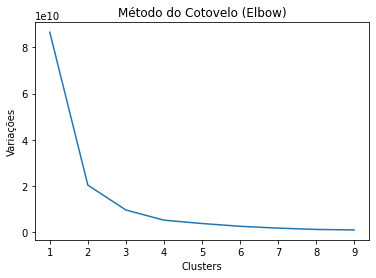

In [ ]:
variacoes = []
for i in range (1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    variacoes.append(kmeans.inertia_)
plt.plot(range(1,10),variacoes)
plt.title('Método do Cotovelo (Elbow)') 
plt.xlabel ('Clusters') 
plt.ylabel ('Variações')

In [ ]:
kmeans_final = KMeans(n_clusters=5)
kmeans_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_pred = kmeans_final.predict(X)
cluster_centro = kmeans_final.cluster_centers_
cluster_centro

array([[ 5.15446509e+01,  1.13207547e-01,  7.06907074e-01,
         8.49056604e-02,  1.24314151e+00,  8.49056604e-02,
         6.10970171e-01,  3.07547170e+00,  6.27547495e+00,
         3.60377358e+00,  3.84303144e+00,  1.11320755e+00,
         3.50416171e+03],
       [ 8.80419333e+01,  6.66666667e-02,  1.13333333e-01,
         6.66666667e-02,  1.54000000e-01,  6.66666667e-02,
         8.58666667e-02,  4.46666667e+00,  4.39537310e+00,
         3.26666667e+00,  8.90839244e-01,  3.00000000e+00,
         5.45330310e+04],
       [ 8.64211429e+01,  0.00000000e+00,  0.00000000e+00,
         1.38777878e-17,  0.00000000e+00, -1.38777878e-17,
         5.55111512e-17,  1.42857143e-01,  4.04714286e-01,
         7.14285714e-01,  4.49050522e+00,  3.00000000e+00,
         8.93226843e+04],
       [ 8.16365333e+01,  1.33333333e-01,  8.32333333e-01,
         6.66666667e-02,  3.30600000e-01,  2.00000000e-01,
         8.22666667e-01,  2.20000000e+00,  2.90579399e+00,
         3.33333333e+00,  2.19505089e

In [ ]:
dtt[kmeans_final.labels_==0].sum

<bound method DataFrame.sum of               %_da_população_total_vivendo_em_cidades  ...  PIB_per_capita
país                                                   ...                
Afghanistan                                    25.754  ...      551.865029
Angola                                         66.177  ...     3437.295458
Albania                                        61.229  ...     5223.809213
Azerbaijan                                     56.031  ...     4717.719834
Burundi                                        13.366  ...      293.963343
...                                               ...  ...             ...
Vietnam                                        36.628  ...     2563.175868
Yemen                                          37.273  ...      935.888143
South Africa                                   66.856  ...     6369.231608
Zambia                                         44.072  ...     1572.344032
Zimbabwe                                       32.210  ...     1683.7

In [ ]:
dtt[kmeans_final.labels_==1].sum


<bound method DataFrame.sum of                %_da_população_total_vivendo_em_cidades  ...  PIB_per_capita
país                                                    ...                
Australia                                       86.124  ...    58392.709121
Austria                                         58.515  ...    51230.275299
Belgium                                         98.041  ...    47292.967110
Canada                                          81.482  ...    46192.375140
Germany                                         77.376  ...    47513.702098
Denmark                                         87.994  ...    61833.713461
Finland                                         85.446  ...    50135.720665
Greenland                                       87.052  ...    53949.814559
Hong Kong                                      100.000  ...    49199.037165
Netherlands                                     91.876  ...    53583.143282
Qatar                                           99.188  .

In [ ]:
dtt[kmeans_final.labels_==2].sum


<bound method DataFrame.sum of              %_da_população_total_vivendo_em_cidades  ...  PIB_per_capita
país                                                  ...                
Bermuda                                      100.000  ...   101207.852636
Switzerland                                   73.849  ...    82708.514386
Ireland                                       63.405  ...    79414.604519
Iceland                                       93.855  ...    76867.298790
Luxembourg                                    91.223  ...   117369.540527
Macao                                        100.000  ...    86355.328312
Norway                                        82.616  ...    81335.651215

[7 rows x 13 columns]>

In [ ]:

dtt[kmeans_final.labels_==3].sum

<bound method DataFrame.sum of                       %_da_população_total_vivendo_em_cidades  ...  PIB_per_capita
país                                                           ...                
Aruba                                                  43.546  ...    30262.487230
Andorra                                                87.984  ...    42051.595407
United Arab Emirates                                   86.789  ...    43004.953358
Brunei                                                 77.942  ...    31627.233053
Cyprus                                                 66.805  ...    28967.576681
Spain                                                  80.565  ...    30405.833051
France                                                 80.709  ...    41358.085619
United Kingdom                                         83.652  ...    42526.439038
Israel                                                 92.501  ...    44214.910351
Italy                                                  7

In [ ]:
dtt[kmeans_final.labels_==4].sum


<bound method DataFrame.sum of                      %_da_população_total_vivendo_em_cidades  ...  PIB_per_capita
país                                                          ...                
Argentina                                             91.991  ...    11687.597997
Bahrain                                               89.394  ...    24133.549307
Barbados                                              31.158  ...    17745.867810
Chile                                                 87.643  ...    15923.358738
Costa Rica                                            80.076  ...    12026.547534
Estonia                                               69.051  ...    23241.888548
Greece                                                79.388  ...    20731.204281
Guam                                                  94.859  ...    15000.000000
Croatia                                               57.242  ...    14674.023127
Hungary                                               71.644  ...  

In [ ]:
dtt[kmeans_final.labels_==5].sum

<bound method DataFrame.sum of Empty DataFrame
Columns: [%_da_população_total_vivendo_em_cidades, qtd_cidades_pop_maior_17M, densidade_media_cidades_pop_maior_17M, qtd_cidades_pop_entre_17M_13M, densidade_media_cidades_pop_entre_17M_13M, qtd_cidades_pop_entre_13M_9M_AT, densidade_media_cidades_pop_entre_13M_9M, qtd_cidades_pop_entre_9M_1M, densidade_media_cidades_pop_entre_9M_1M, qtd_cidades_pop_entre_1M_500k, densidade_media_cidades_pop_entre_1M_500K, IDH_(discretizado), PIB_per_capita]
Index: []>

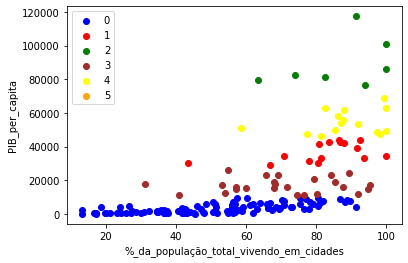

In [ ]:
#%_da_população_total_vivendo_em_cidades x PIB_per_capita
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,12],c='blue', label='0')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,12],c='red',label='1')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,12],c='green', label='2')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,12],c='brown',label='3')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,12],c='yellow', label='4')
#plt.scatter(X[cluster_pred==5,0],X[cluster_pred==5,12],c='orange',label='5')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()
#plt.scatter(cluster_centro[:,0],cluster_centro[:,1], marker='+', s=100)

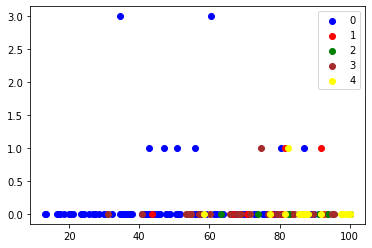

In [ ]:
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1],c='blue', label='0')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1],c='red',label='1')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1],c='green', label='2')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,1],c='brown',label='3')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1],c='yellow', label='4')
plt.legend()

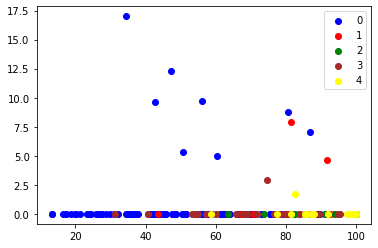

In [ ]:
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,2],c='blue', label='0')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,2],c='red',label='1')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,2],c='green', label='2')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,2],c='brown',label='3')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,2],c='yellow', label='4')
plt.legend()

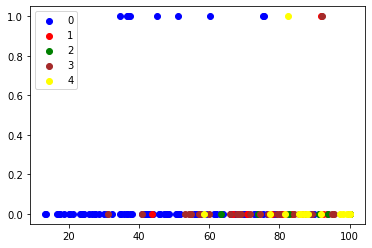

In [ ]:
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,3],c='blue', label='0')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,3],c='red',label='1')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,3],c='green', label='2')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,3],c='brown',label='3')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,3],c='yellow', label='4')
plt.legend()

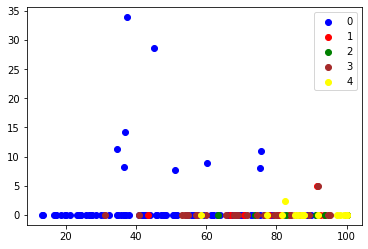

In [ ]:
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,4],c='blue', label='0')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,4],c='red',label='1')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,4],c='green', label='2')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,4],c='brown',label='3')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,4],c='yellow', label='4')
plt.legend()

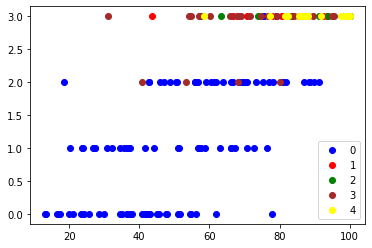

In [ ]:
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,11],c='blue', label='0')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,11],c='red',label='1')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,11],c='green', label='2')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,11],c='brown',label='3')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,11],c='yellow', label='4')
plt.legend()

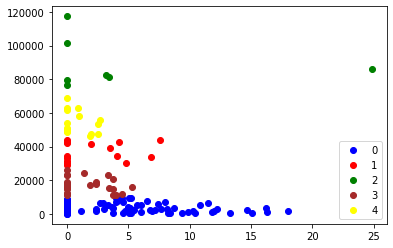

In [ ]:
plt.scatter(X[cluster_pred==0,10],X[cluster_pred==0,12],c='blue', label='0')
plt.scatter(X[cluster_pred==3,10],X[cluster_pred==3,12],c='red',label='1')
plt.scatter(X[cluster_pred==2,10],X[cluster_pred==2,12],c='green', label='2')
plt.scatter(X[cluster_pred==4,10],X[cluster_pred==4,12],c='brown',label='3')
plt.scatter(X[cluster_pred==1,10],X[cluster_pred==1,12],c='yellow', label='4')
plt.legend()

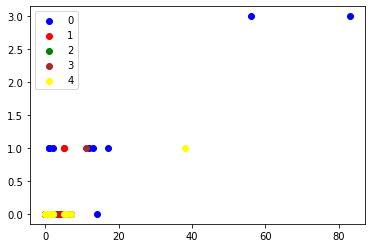

In [ ]:
plt.scatter(X[cluster_pred==0,7],X[cluster_pred==0,1],c='blue', label='0')
plt.scatter(X[cluster_pred==3,7],X[cluster_pred==3,1],c='red',label='1')
plt.scatter(X[cluster_pred==2,7],X[cluster_pred==2,1],c='green', label='2')
plt.scatter(X[cluster_pred==4,7],X[cluster_pred==4,1],c='brown',label='3')
plt.scatter(X[cluster_pred==1,7],X[cluster_pred==1,1],c='yellow', label='4')
plt.legend()

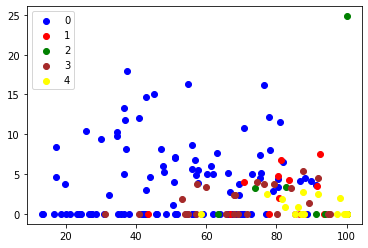

In [ ]:
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,10],c='blue', label='0')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,10],c='red',label='1')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,10],c='green', label='2')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,10],c='brown',label='3')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,10],c='yellow', label='4')
plt.legend()

DBSCAN


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
dt = scaler.fit_transform(dt)

dbscan = DBSCAN(eps=1, min_samples=2) #eps : a distância que especifica as vizinhanças. Dois pontos são considerados vizinhos se a distância entre eles for menor ou igual a eps.
dbscan.fit(dt)
previsoes = dbscan.labels_
previsoes

array([ 0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  1, -1,  0,  0,
        0,  0,  0,  2,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1, -1,
       -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  3,  0,  3,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0, -1,  0,  0,  0, -1,
        0,  0,  0,  1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,
        0,  0, -1,  1,  0,  0,  0, -1,  0,  0, -1,  1, -1,  0,  0])

In [ ]:
previsoes[previsoes == -1].size

39

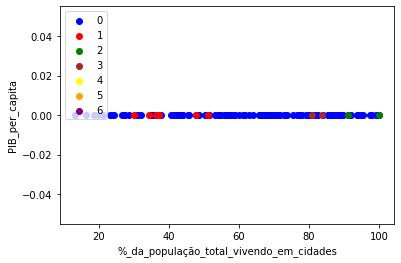

In [ ]:
plt.scatter(X[previsoes==0,0],X[previsoes==0,2],c='blue', label='0')
plt.scatter(X[previsoes==1,0],X[previsoes==1,2],c='red',label='1')
plt.scatter(X[previsoes==2,0],X[previsoes==2,2],c='green', label='2')
plt.scatter(X[previsoes==3,0],X[previsoes==3,2],c='brown',label='3')
plt.scatter(X[previsoes==4,0],X[previsoes==4,2],c='yellow', label='4')
plt.scatter(X[previsoes==5,0],X[previsoes==5,2],c='orange',label='5')
plt.scatter(X[previsoes==6,0],X[previsoes==6,2],c='purple',label='6')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()

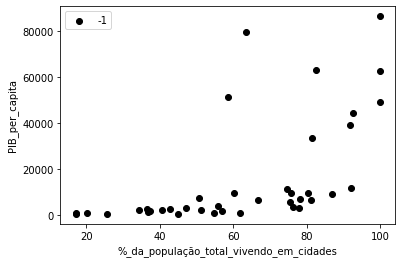

In [ ]:
plt.scatter(X[previsoes==-1,0],X[previsoes==-1,12],c='black',label='-1')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()

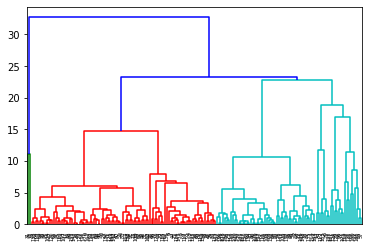

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

scaler=StandardScaler()
dt = scaler.fit_transform(dt)

dendograma = dendrogram(linkage(dt,method='ward'))

**ANÁLISE DE SILHUETA** A pontuação é maior quando os clusters são densos e bem separados, o que se relaciona com um conceito padrão de um cluster


In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
#X, y = dt

In [ ]:
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.6614520997911713

**Índice Calinski-Harabasz**
A pontuação é maior quando os clusters são densos e bem separados, o que se relaciona com um conceito padrão de um cluster.



In [ ]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(X, labels)


922.1848471700575

**Índice Davies-Bouldin** Values closer to zero indicate a better partition.


In [ ]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=5, random_state=1).fit(X)
labels = kmeans.labels_
davies_bouldin_score(X, labels)

0.5203640824915807